In [1]:
#import sys
#!$sys.executable -m pip install "yahoofinancials"
import warnings
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sns.set_theme()
import yahoofinance_data_grabber as yhf

In [3]:
df_clean = pd.read_csv("datasets/covid_19_clean_complete.csv")
df_daywise = pd.read_csv("datasets/day_wise.csv")
df_country = pd.read_csv("datasets/country_wise_latest.csv")
index_list = ['^GSPC', '^VIX', '^N225', '000001.SS', '^KS11', '^STOXX50E']
data_list = yhf.grab_index_data(index_list)

In [26]:
df_clean

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [4]:
SnP_500 = data_list[0]
VIX = data_list[1]
Nikkei = data_list[2]
Shanghai_SSE = data_list[3]
Korean_KOSPI = data_list[4]
STOXX50E = data_list[5]

In [19]:
covid_US = df_clean[df_clean['Country/Region'] == "US"]
SnP_500_merged = SnP_500.merge(covid_US, right_on = "Date", left_on = "formatted_date", how = "right")
snp_500_merged_dropna = SnP_500_merged.dropna(subset = ['close'])
snp_500_merged_dropna

,high,low,open,close,volume,adjclose,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,3337.770020,3320.040039,3330.020020,3321.750000,3.619850e+09,3321.750000,NaN,US,40.0,-100.0,2020-01-22,1,0,0,1,Americas
1,3326.879883,3301.870117,3315.770020,3325.540039,3.764860e+09,3325.540039,NaN,US,40.0,-100.0,2020-01-23,1,0,0,1,Americas
2,3333.179932,3281.530029,3333.100098,3295.469971,3.707130e+09,3295.469971,NaN,US,40.0,-100.0,2020-01-24,2,0,0,2,Americas
5,3258.850098,3234.500000,3247.159912,3243.629883,3.823100e+09,3243.629883,NaN,US,40.0,-100.0,2020-01-27,5,0,0,5,Americas
6,3285.780029,3253.219971,3255.350098,3276.239990,3.526720e+09,3276.239990,NaN,US,40.0,-100.0,2020-01-28,5,0,0,5,Americas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,3277.290039,3247.770020,3268.520020,3257.300049,4.547960e+09,3257.300049,NaN,US,40.0,-100.0,2020-07-21,3899211,142121,1182018,2575072,Americas
182,3279.320068,3253.100098,3254.860107,3276.020020,4.255190e+09,3276.020020,NaN,US,40.0,-100.0,2020-07-22,3970121,143316,1210849,2615956,Americas
183,3279.989990,3222.659912,3271.639893,3235.659912,4.290460e+09,3235.659912,NaN,US,40.0,-100.0,2020-07-23,4038816,144430,1233269,2661117,Americas
184,3227.260010,3200.050049,3218.580078,3215.629883,3.894900e+09,3215.629883,NaN,US,40.0,-100.0,2020-07-24,4112531,145560,1261624,2705347,Americas


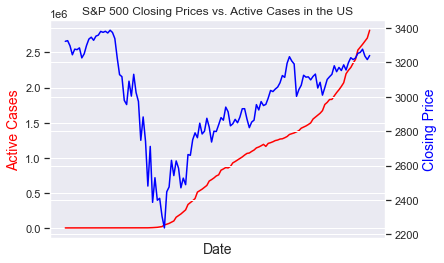

In [6]:
fig,ax = plt.subplots()
ax.plot(snp_500_merged_dropna.Date, snp_500_merged_dropna.Active, color="red")
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Active Cases",color="red",fontsize=14)
ax2=ax.twinx()
ax2.plot(snp_500_merged_dropna.Date, snp_500_merged_dropna.close,color="blue")
ax2.set_ylabel("Closing Price",color="blue",fontsize=14)
plt.xticks([])
plt.title("S&P 500 Closing Prices vs. Active Cases in the US")
plt.show()

In [20]:
covid_japan = df_clean[df_clean['Country/Region'] == "Japan"]
Nikkei_merged = Nikkei.merge(covid_japan, right_on = "Date", left_on = "formatted_date", how = "right")
Nikkei_merged_dropna = Nikkei_merged.dropna(subset = ['close'])
Nikkei_merged_dropna

,high,low,open,close,volume,adjclose,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,24040.869141,23831.099609,23835.490234,24031.349609,49000000.0,24031.349609,NaN,Japan,36.204824,138.252924,2020-01-22,2,0,0,2,Western Pacific
1,23910.009766,23779.230469,23843.509766,23795.439453,55500000.0,23795.439453,NaN,Japan,36.204824,138.252924,2020-01-23,2,0,0,2,Western Pacific
2,23869.380859,23755.320312,23850.119141,23827.179688,48700000.0,23827.179688,NaN,Japan,36.204824,138.252924,2020-01-24,2,0,0,2,Western Pacific
5,23463.890625,23317.320312,23427.900391,23343.509766,62400000.0,23343.509766,NaN,Japan,36.204824,138.252924,2020-01-27,4,0,1,3,Western Pacific
6,23243.359375,23115.150391,23126.929688,23215.710938,64400000.0,23215.710938,NaN,Japan,36.204824,138.252924,2020-01-28,7,0,1,6,Western Pacific
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,22857.820312,22643.519531,22807.570312,22696.419922,55900000.0,22696.419922,NaN,Japan,36.204824,138.252924,2020-07-17,24104,985,18944,4175,Western Pacific
180,22788.529297,22580.189453,22772.070312,22717.480469,50000000.0,22717.480469,NaN,Japan,36.204824,138.252924,2020-07-20,25706,988,19603,5115,Western Pacific
181,22925.580078,22780.220703,22789.380859,22884.220703,68600000.0,22884.220703,NaN,Japan,36.204824,138.252924,2020-07-21,26463,988,20001,5474,Western Pacific
182,22855.310547,22732.919922,22791.750000,22751.609375,65400000.0,22751.609375,NaN,Japan,36.204824,138.252924,2020-07-22,27136,990,20482,5664,Western Pacific


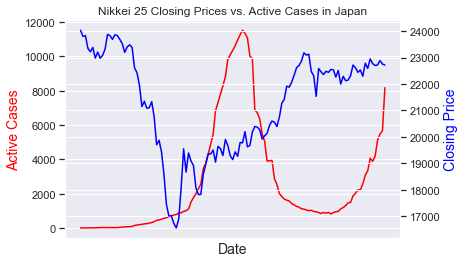

In [8]:
fig,ax = plt.subplots()
ax.plot(Nikkei_merged_dropna.Date, Nikkei_merged_dropna.Active, color="red")
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Active Cases",color="red",fontsize=14)
ax2=ax.twinx()
ax2.plot(Nikkei_merged_dropna.Date, Nikkei_merged_dropna.close,color="blue")
ax2.set_ylabel("Closing Price",color="blue",fontsize=14)
plt.xticks([])
plt.title("Nikkei 25 Closing Prices vs. Active Cases in Japan")
plt.show()

In [36]:
covid_china = df_clean[df_clean['Country/Region'] == "China"]
covid_china_grouped = covid_china.groupby(by = ['Date'], as_index = False).sum()
covid_china_grouped['Country/Region'] = 'China'
Shanghai_SSE_merged = Shanghai_SSE.merge(covid_china_grouped, right_on = "Date", left_on = "formatted_date", how = "right")
Shanghai_SSE_merged_dropna = Shanghai_SSE_merged.dropna(subset = ['close'])

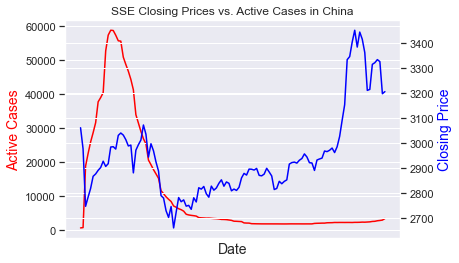

In [10]:
fig,ax = plt.subplots()
ax.plot(Shanghai_SSE_merged_dropna.Date, Shanghai_SSE_merged_dropna.Active, color="red")
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Active Cases",color="red",fontsize=14)
ax2=ax.twinx()
ax2.plot(Shanghai_SSE_merged_dropna.Date, Shanghai_SSE_merged_dropna.close,color="blue")
ax2.set_ylabel("Closing Price",color="blue",fontsize=14)
plt.xticks([])
plt.title("SSE Closing Prices vs. Active Cases in China")
plt.show()

In [11]:
covid_korea = df_clean[df_clean['Country/Region'] == "South Korea"]
Korean_KOSPI_merged = Korean_KOSPI.merge(covid_korea, right_on = "Date", left_on = "formatted_date", how = "right")
Korean_KOSPI_merged_dropna = Korean_KOSPI_merged.dropna(subset = ['close'])

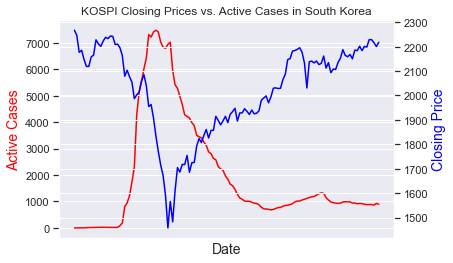

In [12]:
fig,ax = plt.subplots()
ax.plot(Korean_KOSPI_merged_dropna.Date, Korean_KOSPI_merged_dropna.Active, color="red")
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Active Cases",color="red",fontsize=14)
ax2=ax.twinx()
ax2.plot(Korean_KOSPI_merged_dropna.Date, Korean_KOSPI_merged_dropna.close,color="blue")
ax2.set_ylabel("Closing Price",color="blue",fontsize=14)
plt.xticks([])
plt.title("KOSPI Closing Prices vs. Active Cases in South Korea")
plt.show()

In [31]:
eurozone = ['Austria', 'Belgium', 'Finland', 'France', 'Germany', 'Greece', 'Ireland', 'Italy', 'Luxembourg', 'Netherlands', 'Portugal', 'Spain']
covid_euro = df_clean[df_clean['WHO Region'] == 'Europe']
covid_euro_grouped = covid_euro.groupby(by = ['Date'], as_index = False).sum()
covid_euro_grouped['Country/Region'] = 'Europe'
STOXX50E_merged = STOXX50E.merge(covid_euro_grouped, right_on = "Date", left_on = "formatted_date", how = "right")
STOXX50E_merged_dropna = STOXX50E_merged.dropna(subset = ['close'])
STOXX50E_merged_dropna

,high,low,open,close,volume,adjclose,Date,Lat,Long,Confirmed,Deaths,Recovered,Active,Country/Region
0,3802.679932,3765.489990,3792.050049,3769.790039,32477100.0,3769.790039,2020-01-22,3021.204708,549.247689,0,0,0,0,Europe
1,3770.010010,3734.060059,3764.100098,3736.850098,33330600.0,3736.850098,2020-01-23,3021.204708,549.247689,0,0,0,0,Europe
2,3795.330078,3744.750000,3744.750000,3779.159912,31726500.0,3779.159912,2020-01-24,3021.204708,549.247689,2,0,0,2,Europe
5,3754.629883,3673.800049,3754.629883,3677.840088,44844200.0,3677.840088,2020-01-27,3021.204708,549.247689,4,0,0,4,Europe
6,3722.709961,3671.739990,3684.689941,3719.219971,37478400.0,3719.219971,2020-01-28,3021.204708,549.247689,8,0,0,8,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,3451.159912,3401.419922,3404.159912,3405.350098,50373700.0,3405.350098,2020-07-21,3021.204708,549.247689,3168079,208683,1892294,1067102,Europe
182,3402.189941,3361.530029,3399.879883,3370.760010,37088700.0,3370.760010,2020-07-22,3021.204708,549.247689,3189394,209185,1910928,1069281,Europe
183,3400.919922,3362.340088,3379.570068,3371.739990,35874300.0,3371.739990,2020-07-23,3021.204708,549.247689,3216701,209704,1933356,1073641,Europe
184,3349.540039,3294.889893,3349.540039,3310.889893,34261300.0,3310.889893,2020-07-24,3021.204708,549.247689,3239712,210193,1954150,1075369,Europe


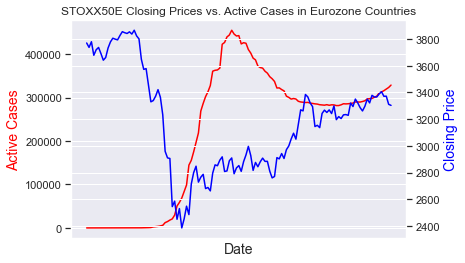

In [14]:
fig,ax = plt.subplots()
ax.plot(STOXX50E_merged_dropna.Date, STOXX50E_merged_dropna.Active, color="red")
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Active Cases",color="red",fontsize=14)
ax2=ax.twinx()
ax2.plot(STOXX50E_merged_dropna.Date, STOXX50E_merged_dropna.close,color="blue")
ax2.set_ylabel("Closing Price",color="blue",fontsize=14)
plt.xticks([])
plt.title("STOXX50E Closing Prices vs. Active Cases in Eurozone Countries")
plt.show()

### Data Cleaning For Modeling

In [77]:
combined = snp_500_merged_dropna.append(Nikkei_merged_dropna).append(Shanghai_SSE_merged_dropna).append(Korean_KOSPI_merged_dropna).append(STOXX50E_merged_dropna)
combined['change'] = combined['close'] - combined['open']
by_day = combined.drop(columns = ['high', 'low', 'open', 'close', 'adjclose','volume', 'Date', 'Province/State', 'Lat', 'Long', 'WHO Region'])
by_day

,Country/Region,Confirmed,Deaths,Recovered,Active,change
0,US,1,0,0,1,-8.270020
1,US,1,0,0,1,9.770020
2,US,2,0,0,2,-37.630127
5,US,5,0,0,5,-3.530029
6,US,5,0,0,5,20.889893
...,...,...,...,...,...,...
181,Europe,3168079,208683,1892294,1067102,1.190186
182,Europe,3189394,209185,1910928,1069281,-29.119873
183,Europe,3216701,209704,1933356,1073641,-7.830078
184,Europe,3239712,210193,1954150,1075369,-38.650146


In [80]:
by_month = combined.drop(columns = ['high', 'low', 'open', 'close', 'adjclose','volume', 'Province/State', 'Lat', 'Long', 'WHO Region'])
by_month['Date'] = by_month['Date'].str[:-3]
by_month = by_month.groupby(['Country/Region', 'Date'], as_index=False).sum()
#by_month = by_month.drop(columns = 'Date')
by_month

,Country/Region,Date,Confirmed,Deaths,Recovered,Active,change
0,China,2020-01,1191,35,58,1098,-39.156006
1,China,2020-02,1157400,32933,253182,871285,396.929932
2,China,2020-03,1785060,69912,1391267,323881,-16.989014
3,China,2020-04,1750772,83061,1601044,66667,104.900146
4,China,2020-05,1512914,83476,1398152,31286,-15.891113
5,China,2020-06,1687630,92771,1558214,36645,130.266846
6,China,2020-07,1621808,88241,1489303,44264,151.959229
7,Europe,2020-01,52,0,0,52,-122.549561
8,Europe,2020-02,3987,81,452,3454,-259.460693
9,Europe,2020-03,2909508,159195,281488,2468825,-586.939697


### Modeling

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns

In [59]:
## Models and modeling
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

## Data Munging
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

## Measurements
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [92]:
data = by_day.drop(columns = 'change')
target = by_day['change']

categorical = OneHotEncoder().fit_transform(data[['Country/Region']].values).toarray()
numerical = data.drop(columns = 'Country/Region').values
data = np.append(categorical, numerical, axis=1)

train_data, test_data, train_target, test_target = train_test_split(
    data, target, test_size=0.25, random_state=123)

In [93]:
model = LinearRegression()
model = model.fit(train_data, train_target)
preds = model.predict(test_data)

mse = mean_squared_error(test_target, preds)
r2 = r2_score(test_target, preds)

print('Model MSE:', mse)
print('Model r^2:', r2)

Model MSE: 28119.953757697447
Model r^2: -0.00943210368245917


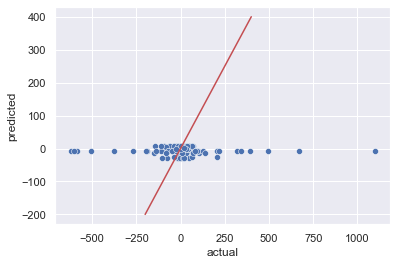

In [94]:
df = pd.DataFrame(data={'predicted':preds, 'actual':test_target})
x_line = np.linspace(-200, 400, 100)
y_line = x_line
sns.scatterplot(data = df, x = 'actual', y = 'predicted')
plt.plot(x_line, y_line, color = 'r')

In [79]:
model = KNeighborsRegressor()
model = model.fit(train_data, train_target)
preds = model.predict(test_data)

mse = mean_squared_error(test_target, preds)

print('Model MSE:', mse)

Model MSE: 24232.66438073403


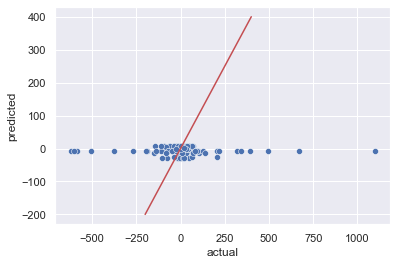

In [95]:
df = pd.DataFrame(data={'predicted':preds, 'actual':test_target})
x_line = np.linspace(-200, 400, 100)
y_line = x_line
sns.scatterplot(data = df, x = 'actual', y = 'predicted')
plt.plot(x_line, y_line, color = 'r')

In [96]:
data = by_month.drop(columns = ['change','Date'])
target = by_month['change']

categorical = OneHotEncoder().fit_transform(data[['Country/Region']].values).toarray()
numerical = data.drop(columns = 'Country/Region').values
data = np.append(categorical, numerical, axis=1)

train_data, test_data, train_target, test_target = train_test_split(
    data, target, test_size=0.25, random_state=123)

In [97]:
model = LinearRegression()
model = model.fit(train_data, train_target)
preds = model.predict(test_data)

mse = mean_squared_error(test_target, preds)
r2 = r2_score(test_target, preds)

print('Model MSE:', mse)
print('Model r^2:', r2)

Model MSE: 11762.545935945162
Model r^2: 0.39773102626299517


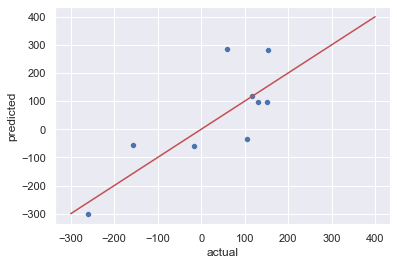

In [99]:
df = pd.DataFrame(data={'predicted':preds, 'actual':test_target})
x_line = np.linspace(-300, 400, 100)
y_line = x_line
sns.scatterplot(data = df, x = 'actual', y = 'predicted')
plt.plot(x_line, y_line, color = 'r')

In [83]:
model = KNeighborsRegressor()
model = model.fit(train_data, train_target)
preds = model.predict(test_data)

mse = mean_squared_error(test_target, preds)

print('Model MSE:', mse)

Model MSE: 24232.66438073403


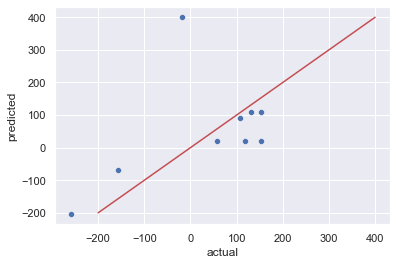

In [90]:
df = pd.DataFrame(data={'predicted':preds, 'actual':test_target})
x_line = np.linspace(-200, 400, 100)
y_line = x_line
sns.scatterplot(data = df, x = 'actual', y = 'predicted')
plt.plot(x_line, y_line, color = 'r')